# climate_station_display
The purpose of this script is to ECCC climate station locations and filter stations
based on province and time window. 

In [3]:
# import modules 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# reading input file 
input_file = 'input/Station Inventory EN.csv'
input_shape = 'input/Fraser_Basin.shp'
station = pd.read_csv(input_file)

output = 'output/Fraser_climate_Station.shp'

In [6]:
#finding station based on the desired criteria 
r = np.where((station['Province'] == 'BRITISH COLUMBIA') & (station['First Year'] <=2000) & 
             (station['Last Year'] >=2017))

In [7]:
#create dataframe 
df = pd.DataFrame({'ClimateID':station['Climate ID'][r[0]],
     'Lon':station['Lon'][r[0]], 'Lat':station['Lat'][r[0]],
     'First Year':station['First Year'][r[0]], 'Last Year':station['Last Year'][r[0]]})

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Lon, df.Lat))

# set CRS to NAD83
gdf = gdf.set_crs('EPSG:4269')

print(gdf.head())

   ClimateID     Lon    Lat  First Year  Last Year  \
12   1011500 -123.74  48.94        1919       2019   
23   1012040 -124.13  48.82        1949       2018   
26   1012055 -124.05  48.83        1960       2019   
28   1012475 -123.23  48.42        1997       2019   
39   1012710 -123.44  48.43        1957       2019   

                       geometry  
12  POINT (-123.74000 48.94000)  
23  POINT (-124.13000 48.82000)  
26  POINT (-124.05000 48.83000)  
28  POINT (-123.23000 48.42000)  
39  POINT (-123.44000 48.43000)  


In [8]:
#clip points to Fraser Basin bounday 
Fraser = gpd.read_file(input_shape)
gdf_clip = gpd.clip(gdf, Fraser)

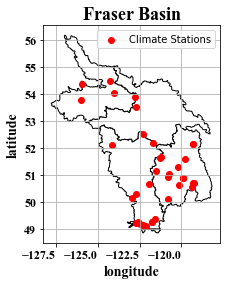

In [9]:
#display Fraser Basin and climate station together 
ax = Fraser.plot(color='white', edgecolor='black')

gdf_clip.plot(ax=ax, color='red', label = 'Climate Stations')

# set lables 
ax.set_title('Fraser Basin', fontsize=18, fontname='Times New Roman', fontweight='bold')
ax.set_xlabel("longitude", fontsize=14, fontname='Times New Roman', fontweight='bold')
ax.set_ylabel("latitude", fontsize=14, fontname='Times New Roman', fontweight='bold')

# set axis 
plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor", fontsize=12, fontname='Times New Roman', 
             fontweight='bold')
plt.setp(ax.get_yticklabels(), fontsize=12, fontname='Times New Roman', 
             fontweight='bold')
ax.grid(True)
ax.legend()

plt.show()


In [10]:
#save geodatabase 
gdf_clip.to_file(output)